In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import h_transition
import pickle
import os
import copy
import time
import os

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [3]:
res_path = "../../Results/Ising_Frustrated/"
files = os.listdir(res_path + "B/")

L = 20

ratios = np.arange(0, 1, 0.1)
B = np.arange(0, 1, 0.1) 

In [4]:
qpu = DWaveSampler(profile='CINECA') #'defaults'
sampler = EmbeddingComposite(qpu)

In [5]:
Magnetizations, Chi, Energies = h_transition(L, ratios, B, sampler, num_reads=100)

Computing Phase Transition for B=0.0


100%|██████████| 10/10 [02:36<00:00, 15.61s/it]


Computing Phase Transition for B=0.1


100%|██████████| 10/10 [02:44<00:00, 16.45s/it]


Computing Phase Transition for B=0.2


100%|██████████| 10/10 [03:15<00:00, 19.59s/it]


Computing Phase Transition for B=0.30000000000000004


100%|██████████| 10/10 [03:34<00:00, 21.44s/it]


Computing Phase Transition for B=0.4


100%|██████████| 10/10 [03:30<00:00, 21.03s/it]


Computing Phase Transition for B=0.5


100%|██████████| 10/10 [02:19<00:00, 13.94s/it]


Computing Phase Transition for B=0.6000000000000001


100%|██████████| 10/10 [03:50<00:00, 23.04s/it]


Computing Phase Transition for B=0.7000000000000001


100%|██████████| 10/10 [02:44<00:00, 16.44s/it]


Computing Phase Transition for B=0.8


100%|██████████| 10/10 [02:42<00:00, 16.27s/it]


Computing Phase Transition for B=0.9


100%|██████████| 10/10 [02:21<00:00, 14.18s/it]


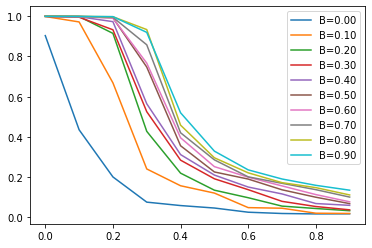

In [13]:
for i, M in enumerate(Magnetizations):
    plt.plot(ratios, M, label=f"B={B[i]:0.2f}")
plt.legend()
plt.savefig("Phase_transition_B_changing.png")